# Лабораторная работа №5 "Численное решение системы линейных уравнений, численное интегрирование"
### Выполнил студент 430 группы Королев Алексей
### Вариант 25

1. Выбрать свой вариант системы (номер варианта остается с предыдущей
лабораторной работы). Кроме самой системы в варианте должны быть указаны:
• число уравнений системы
• требуемый метод/методы решения системы
• необходимая относительная точность решения системы
• требуемый метод вычисления интеграла
• необходимая относительная точность вычисления интеграла (если не
указана, то брать — 0,01).
2. Вычислить определенный интеграл заданным методом.
3. Построить график подынтегральной функции, а также график зависимости
значения интеграла от номера итерации предлагаемого метода численного
интегрирования.

4. Решить систему заданным методом (взять число уравнений n=1000)

5. Построить график решения X(i), а также график зависимости нормы решения
от номера итерации предлагаемого метода численного решения системы.


$$x_1=1$$

$$x_{i-1}-(5+\frac{sin^5(i)cos^2(i)}{i^2+1})x_i+(1+sin^2(i))x_{i+1}=-\int_0^1 \frac{e^{(-i^2t^2)}}{1+itcos^2(t)+t^2}dt$$

$$x_n=0.9x_{n-1}+1$$

Метод прогонки.
Важным классом СЛУ являются системы, коэффициенты которой представляются в виде трехдиагональной матрицы (d - коэффициенты главной диагонали, a - коэффициенты на диагонали под главной, c - коэффициенты на диагонали над главной, b - правая часть). Такие системы возникают при решении краевых задач для дифференциальных уравнений разностными методами.
Первое уравнение системы дает соотношение между $x_1$ и $x_2$б в силу которого второе уравнение дает соотношение межуду $x_3$ и $x_4$.
Связь между неизвестными $x_{i-1}$ и $x_i$ в виде:

$$x_{i-1}=L_ix_i+M_i, i=2,3,... (1)$$ 

Из первого уравнения системы следует, что:

$$L_2=-\frac{с_1}{d_1}, M_2=\frac{b_1}{d_1}$$

рекуррентные соотношения:

$$L_{i+1}=-\frac{с_i}{d_i+a_iL_i}, M_{i+1}=\frac{b_i-M_ia_i}{d_i+a_iL_i},i=2,3,...,n-1 $$

Из последнего уравнения системы и соотношения (1) для i=n находим:

$$x_n=\frac{b_n-M_na_n}{d_n+a_nL_n}$$

что позволяет по формулам (1) последовательно найти все остальные неизвестные.

Метод наискорешего спуска.
Параметр $t_k$ в методе наискорейшего спуска выбирается из условия ортогональности невязок на соседних шагах метода (невязка на (к+1)-ом шаге равна $r^k=Ax^k-f$) и имеет вид:

$$t_k=\frac{(r^k,r^k)}{(Ar^k,r^k)}$$

Процесс отыскания корней в координатной форме имеет вид:

$$x^{k+1}_1=-(t_ka_{11}-1)x^k_1-t_ka_{12}x^k_2-...-t_ka_{1n}x^k_n+t_kb_1$$

$$x^{k+1}_2=-t_ka_{21}x^k_1--(t_ka_{22}-1)x^k_2-...-t_ka_{2n}x^k_n+t_kb_2$$

$$x^{k+1}_n=-t_ka_{n1}x^k_1-t_ka_{n2}x^k_2-...--(t_ka_{nn}-1)x^k_n+t_kb_n$$

In [2]:
import sys
import math 
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline

In [3]:
m=1000
I = [ 0.0 for i in range (m)]
Is1=0.0
Is2=0.0
def f(t):
    return (math.e**(-(i**2)*(t**2)))/(1+(i*t*((math.cos(t))**2))+(t**2))
print('Значение интеграла:',' Значение параметра i:', 'Количество разбиений на отрезки:')
for i in range (2,1001):
    for N in range (5,100):
        ##print('')
        ##print('I')
        for n in range (0,N):
            n1=(3.0*n)/(3.0*N)
            n2=((3.0*n)+1.0)/(3.0*N)
            n3=((3.0*n)+2.0)/(3.0*N)
            n4=((3.0*n)+3.0)/(3.0*N)
            Io=f(n1)+(3.0*f(n2))+(3.0*f(n3))+f(n4)
            Is1=Is1+Io
            ##print(Is1)
        ##print('II')
        for n in range (0,2*N):
            N=N*1.0
            n1=(3.0*n)/(6.0*N)
            n2=((3.0*n)+1)/(6.0*N)
            n3=((3.0*n)+2)/(6.0*N)
            n4=((3.0*n)+3)/(6.0*N)
            I1=f(n1)+(3.0*f(n2))+(3.0*f(n3))+f(n4)
            Is2=Is2+I1
            ##print(Is2)
        h=1.0/(3.0*N)
        I1=Is1*(3.0*h/8.0)
        ##print('1-ое')
        ##print(-I1,'',i,'',N)
        h=1.0/(6.0*N)
        I2=Is2*(3.0*h/8.0)
        ##print('2-ое')
        ##print(-I2,'',i,'',N)
        Is1=0.0
        Is2=0.0
        ##print (I1, '', i, '', N, '', I2)
        if abs(I2/I1)<1.01:
            I[i-2]=I2
            print(-I2,'             ', i,'                         ', 3*N)
            break
            break 

Значение интеграла:  Значение параметра i: Количество разбиений на отрезки:
-0.2993339375598269               2                           15.0
-0.20121606892199628               3                           15.0
-0.15110764736570165               4                           15.0
-0.12094299476265416               5                           15.0
-0.10080754463367468               6                           15.0
-0.08641523165563812               7                           15.0
-0.07561553789188484               8                           15.0
-0.0672197062556393               9                           18.0
-0.0604967959442388               10                           18.0
-0.055000597980511955               11                           21.0
-0.05041556057129447               12                           21.0
-0.04653994755866912               13                           24.0
-0.04321392442902805               14                           24.0
-0.04033496501948498               15

In [4]:
II = [ 0.0 for i in range (99)]
for u in range(0,99):
    II[u]=I[u]
    print(II[u])

0.2993339375598269
0.20121606892199628
0.15110764736570165
0.12094299476265416
0.10080754463367468
0.08641523165563812
0.07561553789188484
0.0672197062556393
0.0604967959442388
0.055000597980511955
0.05041556057129447
0.04653994755866912
0.04321392442902805
0.04033496501948498
0.03781238442227074
0.03558975489786579
0.03327427160124357
0.031447978895972464
0.02980303399996208
0.028316032517856672
0.02696758914360614
0.025741402034957235
0.024623601101264728
0.02360228545169543
0.022667185942945308
0.021809410277518086
0.021021242826031683
0.02029598121887277
0.0196277982842609
0.019011622208378223
0.01844303061485812
0.01791815609190128
0.017433601840701154
0.016986366777315975
0.016573779733675045
0.01619344248378812
0.015843181259786853
0.015521006291983172
0.01522507876164728
0.014953684430340002
0.014705213124878267
0.014478143219097015
0.014271030260294174
0.01408249893206885
0.01391123761625547
0.013755994904613662
0.01361557750671813
0.013488849096723153
0.013374729732936906
0.0

График значения интеграла от значения i


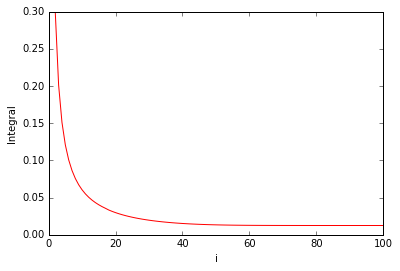

In [5]:
print('График значения интеграла от значения i')
plt.xlabel('i')
plt.ylabel('Integral')
plt.plot(np.linspace(2.0,100.0,99.0),II,'-r')

График подынтегральной функции
красный - i=1
зеленый - i=2
синий - i=3
черный - i=10


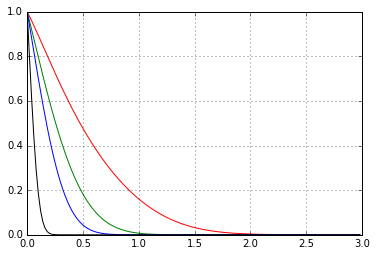

In [6]:
print('График подынтегральной функции')

print('красный - i=1')
print('зеленый - i=2')
print('синий - i=3')
print('черный - i=10')

i=1
x1 = np.arange(0.0, 3.0, 0.02)
y1 = [f(j) for j in x1]
plt.plot(x1,y1,'-r')
# plt.plot(x,y,'yo') 

i=2
x2 = np.arange(0.0, 3.0, 0.02)
y2 = [f(j) for j in x2]
plt.plot(x2,y2,'-g')
# plt.plot(x,y,'yo') 

i=3
x3 = np.arange(0.0, 3.0, 0.02)
y3 = [f(j) for j in x3]
plt.plot(x3,y3,'-b')
# plt.plot(x,y,'yo') 

i=10
x4 = np.arange(0.0, 3.0, 0.02)
y4 = [f(j) for j in x4]
plt.plot(x4,y4,'-k')
# plt.plot(x,y,'yo') 
plt.grid() 
plt.show()

In [7]:
def K1(i):
    return -(5.0+((((math.sin(i))**5.0)*((math.cos(i))**2.0))/((i**2.0)+1.0)))

def K2(i):
    return 1.0+((math.sin(i))**2.0)

#K2(i)=float(K2(i))

Метод прогонки

In [8]:
n=1000
Prog = [ 0.0 for j in range (n)]
L = [ 0.0 for j in range (n)]
M = [ 0.0 for j in range (n)]
x = [ 0.0 for j in range (n)]
for i in range (2,n+1):
    if i==2:
        L[i-2]=0.0
        M[i-2]=1.0
        x[i-2]=1.0
    if i>2:
        L[i-2] = -(K2(i-1))/(L[i-3]+K1(i-1))
        M[i-2] = ((-I[i-3]-M[i-3])/(L[i-3]+K1(i-1)))
x[n-1]=((1.0+(0.9*M[n-2]))/(((-0.9)*L[n-2])+1.0))
for i in range (n-2,0,-1):
    x[i]=(L[i]*x[i+1])+M[i]
for u in range(0,n):
    print(u+1,x[u])
    Prog[u]=x[u]
print((x[0])+(K1(2)*x[1])+(K2(2)*x[2]))


1 1.0
2 0.3004342874126046
3 0.11457383645090988
4 0.06982882339144053
5 0.052790932568226256
6 0.0380562728767533
7 0.03402484940829814
8 0.0319216831611152
9 0.02525628290053283
10 0.0232023409796338
11 0.02334249751941988
12 0.019254961016339053
13 0.017479895701553356
14 0.018363738149296524
15 0.015710133291714452
16 0.013955293756684774
17 0.0150097219328451
18 0.013251852278388397
19 0.0114905560631611
20 0.012472773360219784
21 0.011493819311103777
22 0.009813859382955677
23 0.010607057442979987
24 0.01018453034747776
25 0.008620569715946328
26 0.00915565279158147
27 0.009163458686589217
28 0.007757579388951226
29 0.008014989169843839
30 0.00834533233926308
31 0.007126616983375177
32 0.007114626351535975
33 0.007671152482655539
34 0.006662077773869231
35 0.006411144462885348
36 0.0071046474105679915
37 0.006320864542129343
38 0.0058734825858411804
39 0.006621757906134002
40 0.006073175645502227
41 0.005478050431062439
42 0.006207211182425571
43 0.005898021299749684
44 0.0052039

Метод наискорешего спуска

In [9]:
sys.setrecursionlimit(1500)
def S(J):
    if J == 1: 
        return (R[0])**2.0
    else:
        return S(J-1)+((R[J-1])**2)

def SA(J):
    if J == 1: 
        return (R[0])**2.0
    else:
        return SA(J-1)+(R[J-1]*RA[J-1])
        
def NX(J):
    if J == 1: 
        return (X[0])**2.0
    else:
        return NX(J-1)+(X[J-1]*X[J-1])
    
def Nx(J):
    if J == 1: 
        return (x[0])**2.0
    else:
        return Nx(J-1)+(x[J-1]*x[J-1])
def Norma(J):
    if J == 1: 
        return (Prog[0])**2.0
    else:
        return Norma(J-1)+(Prog[J-1]**2.0)

In [10]:
e=0.001
n=1000
Sp = [ 0.0 for j in range (n)]
x = [ 0.0 for j in range (n)]
X = [ 0.1 for j in range(n)]
R = [ 0.0 for j in range(n)]
RA = [ 0.0 for j in range(n)]
for u in range (1,2000):
    for i in range (1,n+1):
        j=i*1.0
        if i==1:
            R[i-1]=X[i-1]-1.0
            #print(i,R[i-1])
        if i>1  and i!=n:
            R[i-1]=X[i-2]+(K1(j)*X[i-1])+(K2(j)*X[i])+I[i-2]
            #print(i,R[i-1])
        if i==n:
            R[i-1]=X[i-1]-(0.9*X[i-2])-1.0
            #print(i,R[i-1])
    for i in range (1,n+1):
        j=i*1.0
        if i==1:
            RA[i-1]=R[i-1]
            #print(i,RA[i-1])
        if i>1 and i!=n:
            RA[i-1]=R[i-2]+(K1(j)*R[i-1])+(K2(j)*R[i])
            #print(i,RA[i-1])
        if i==n:
            RA[i-1]=R[i-1]-(0.9*R[i-2])
            #print(i,RA[i-1])
    t=((S(n))/(SA(n)))
    for i in range (2,n+2):
        j=i*1.0
        if i==2:
            x[i-2]= 1.0
        if i>2 and i!=n+1:
            x[i-2] = ((-1.0)*t*X[i-3])+((1.0-(t*K1(j-1)))*X[i-2])+((-1.0)*t*K2(j-1)*X[i-1])
        if i==n+1:
            x[i-2]= (0.9*x[i-3])+1.0
        #print(i-1,x[i-2])
#     print(t)
#     print(x)
    N1=NX(n)
    N2=Nx(n)
    if abs((N2)/(N1))<1.001 and abs((N2)/(N1))>0.999:
        print('x')
        for q in range(0,n):
            print(q+1,X[q])
            Sp[q]=X[q]
        break
        break
    for U in range (0,n):
        X[U]=x[U]

x
1 1.0
2 0.21460617563678777
3 0.046284224442955234
4 0.007845468224131454
5 0.004126565996012526
6 -0.0010817794525717402
7 0.0015714651627647264
8 -0.0013669394252002862
9 0.0009310841369451003
10 -0.0007099186452518515
11 0.0006061755824276157
12 -0.00037874355898699565
13 0.0002456943490918942
14 -0.00019009919401699813
15 0.000113413863570008
16 -6.495029676971734e-05
17 4.5945278488225856e-05
18 -2.6936360261800688e-05
19 1.4763296590593167e-05
20 -1.0903472586109538e-05
21 7.351375382768823e-06
22 -4.760594732609264e-06
23 4.836620780169527e-06
24 -4.312700872040278e-06
25 3.2305257946456826e-06
26 -3.5815761080595785e-06
27 3.488228233272052e-06
28 -2.564398735397788e-06
29 2.5618417952482457e-06
30 -2.5478461246332605e-06
31 1.8403461740389597e-06
32 -1.650763527395415e-06
33 1.640713706442357e-06
34 -1.131616693194719e-06
35 8.007579086269863e-07
36 -5.948909897166651e-07
37 2.4824687335711e-07
38 8.121775727898917e-08
39 -4.955710086946985e-07
40 6.268984599734062e-07
41 -6

График значения x от значения i


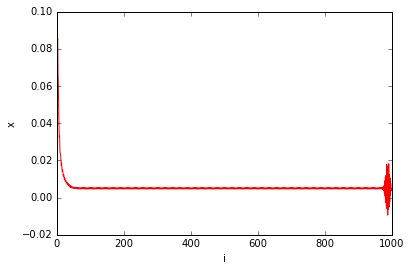

In [12]:
print('График значения x от значения i')
plt.xlabel('i')
plt.ylabel('x')
plt.plot(np.linspace(1.0,1000.0,1000.0),np.array(Prog)-np.array(Sp),'-r')
# plt.plot(np.linspace(1.0,1000.0,1000.0),Sp,'-b')